<div dir='rtl' id="intro"><h2 id="clustering">ابر کلمه  </h2><hr></div>
<br>
<div dir='rtl'>
ابتدا کتابخانه های مورد نیاز را ایمپورت میکنیم

In [1]:
# some libraries that may be needed
import numpy as np
import re
from hazm import *
import pandas as pd

<div dir='rtl'>
حال دیتا ست را به صورت دیتا فریم در می آوریم

In [2]:
original_df = pd.read_csv("random_sample_astan.csv")
original_df = original_df.sort_values(by=["تاريخ دريافت"])
original_df = original_df.reset_index()

<div dir='rtl'>
اکنون یک بازه شروع و پایان مشخص میکنیم و داد های بین این دو بازه را به صورت یک استرینگ در می آوریم

In [3]:
start = "1399/07/01"
stop = "1400/05/01"
QaA = ""
validate = 0
for i in range(len(original_df)):
  if(original_df.loc[i, 'تاريخ دريافت'] == start):
    while(True):
      if(original_df.loc[i, 'تاريخ دريافت'] == stop):
        validate = 1
        break
      QaA += f" {original_df.loc[i, 'متن پيام']} {original_df.loc[i, 'پاسخ']}"
      i += 1
  if(validate == 1):
    break

<div dir='rtl'>
وقت آن است داده ایست واژه ها را استخراج کنیم

In [4]:
files = open("persian.txt", encoding="utf8")
stop_words = [x.strip() for x in files.readlines()]

<div dir='rtl'>
حال که ایست واژه ها را داریم کافیست داده را پیش پردازش و نورمالایز کنیم و ایست واژه هارا از آن حذف کنیم.

In [5]:
new_QaA = ""
stemmer = Stemmer()
normalizer = Normalizer()
words = word_tokenize(normalizer.normalize(QaA))
for j in words:
  if ((j not in stop_words) & (stemmer.stem(j) not in stop_words) & (not re.search('[a-zA-Z_ء۱۲۳۴۵۶۷۸۹۰]', j))):
    new_QaA += f" { stemmer.stem(j)}"
new_QaA = normalizer.normalize(new_QaA)

<div dir='rtl'>
در مرحله آخر هم با استفاده از کتابخانه worldcould ابر کلمه را به تصویر میکشیم

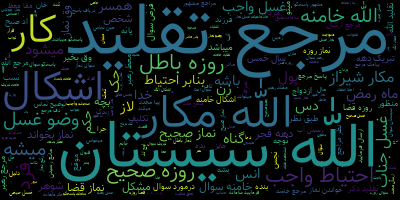

In [6]:
from wordcloud_fa import WordCloudFa
wc = WordCloudFa()
word_cloud = wc.generate(new_QaA)
image = word_cloud.to_image()
image